In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [151]:
coefficients_1881 = pd.read_csv('/Users/hanrui/Dropbox/Mac (3)/Documents/Infra&Nation/Mechanism/trade_cost_coefficients_1881.csv')
coefficients_1931 = pd.read_csv('/Users/hanrui/Dropbox/Mac (3)/Documents/Infra&Nation/Mechanism/trade_cost_coefficients_1931.csv')

In [152]:
coefficients_1881['CI_Lower'] = coefficients_1881['coef'] - 1.96 * coefficients_1881['se']
coefficients_1881['CI_Upper'] = coefficients_1881['coef'] + 1.96 * coefficients_1881['se']
coefficients_1931['CI_Lower'] = coefficients_1931['coef'] - 1.96 * coefficients_1931['se']
coefficients_1931['CI_Upper'] = coefficients_1931['coef'] + 1.96 * coefficients_1931['se']

In [153]:
city_vars_1881 = [
    'Bombay', 'Calcutta', 'Madras', 'Hyderabad', 'Lucknow', 'Benares', 'Delhi', 
    'Patna', 'Agra', 'Bangalore', 'Amritsar', 'Cawnpore', 'Lahore', 'Allahabad', 
    'Jaipur', 'Poona', 'Ahmedabad', 'Bareilly', 'Surat', 'Baroda'
]

hindi_belt_1881 = [
    'Lucknow', 'Benares', 'Delhi', 'Patna', 'Agra', 'Cawnpore', 'Allahabad', 'Bareilly'
]

other_cities_1881 = list(set(city_vars_1881) - set(hindi_belt_1881))

city_vars_1931 = [
    'Calcutta', 'Bombay', 'Madras', 'Hyderabad', 'Delhi', 'Lahore', 'Ahmedabad', 'Bangalore',
    'Lucknow', 'Amritsar', 'Karachi', 'Poona', 'Cawnpore', 'Agra', 'Nagpur', 'Benares', 
    'Allahabad', 'Madura', 'Srinagar', 'Patna'
]

hindi_belt_1931 = [
    'Delhi', 'Lucknow', 'Cawnpore', 'Agra', 'Benares', 'Allahabad', 'Patna'
]

other_cities_1931 = list(set(city_vars_1931) - set(hindi_belt_1931))


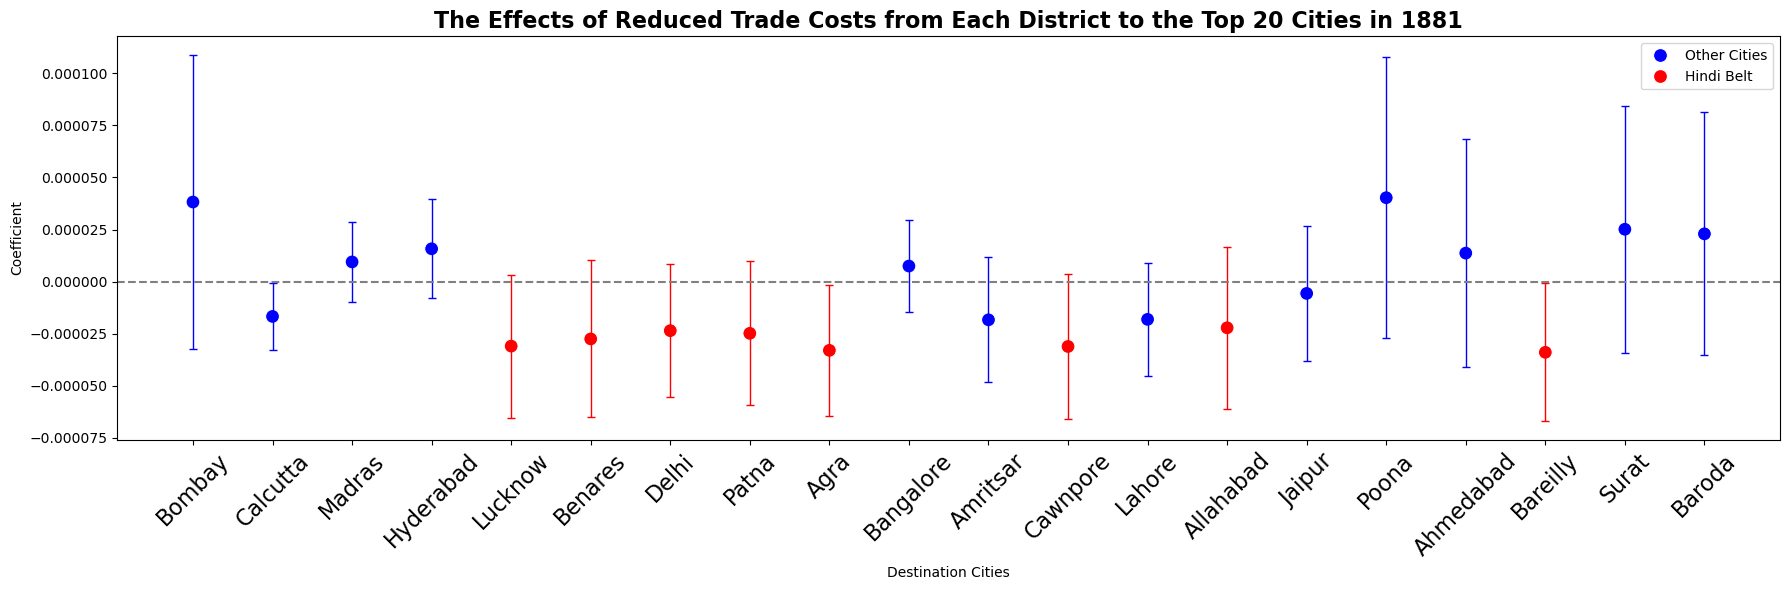

In [154]:

# Add a 'Group' column to the DataFrame
coefficients_1881['Group'] = coefficients_1881['varname'].apply(
    lambda x: 'Hindi Belt' if x in hindi_belt_1881 else 'Other Cities'
)

plt.figure(figsize=(18, 6))

# Plot the coefficients as points with hue
sns.scatterplot(
    x='varname',
    y='coef',
    data=coefficients_1881,
    hue='Group',
    palette={'Hindi Belt': 'red', 'Other Cities': 'blue'},
    s=100
)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Set font properties for x-axis labels
plt.setp(plt.gca().get_xticklabels(), fontsize=16)

# Add error bars manually with matching colors
for index, row in coefficients_1881.iterrows():
    plt.errorbar(
        x=row['varname'],
        y=row['coef'],
        yerr=1.96 * row['se'],
        fmt='none',
        ecolor='red' if row['Group'] == 'Hindi Belt' else 'blue',
        elinewidth=1,
        capsize=3
    )

# Add a horizontal line at y=0
plt.axhline(y=0, color='grey', linestyle='--')

# Set labels and title
plt.xlabel('Destination Cities')
plt.ylabel('Coefficient')
plt.title('The Effects of Reduced Trade Costs from Each District to the Top 20 Cities in 1881', fontdict={'fontsize': 16, 'fontweight': 'bold'})

# Adjust layout
plt.tight_layout()

# Display the legend
plt.legend()

plt.savefig('/Users/hanrui/Dropbox/Mac (3)/Documents/Infra&Nation/Results/Trade_Cost_1881.jpg')
plt.show()



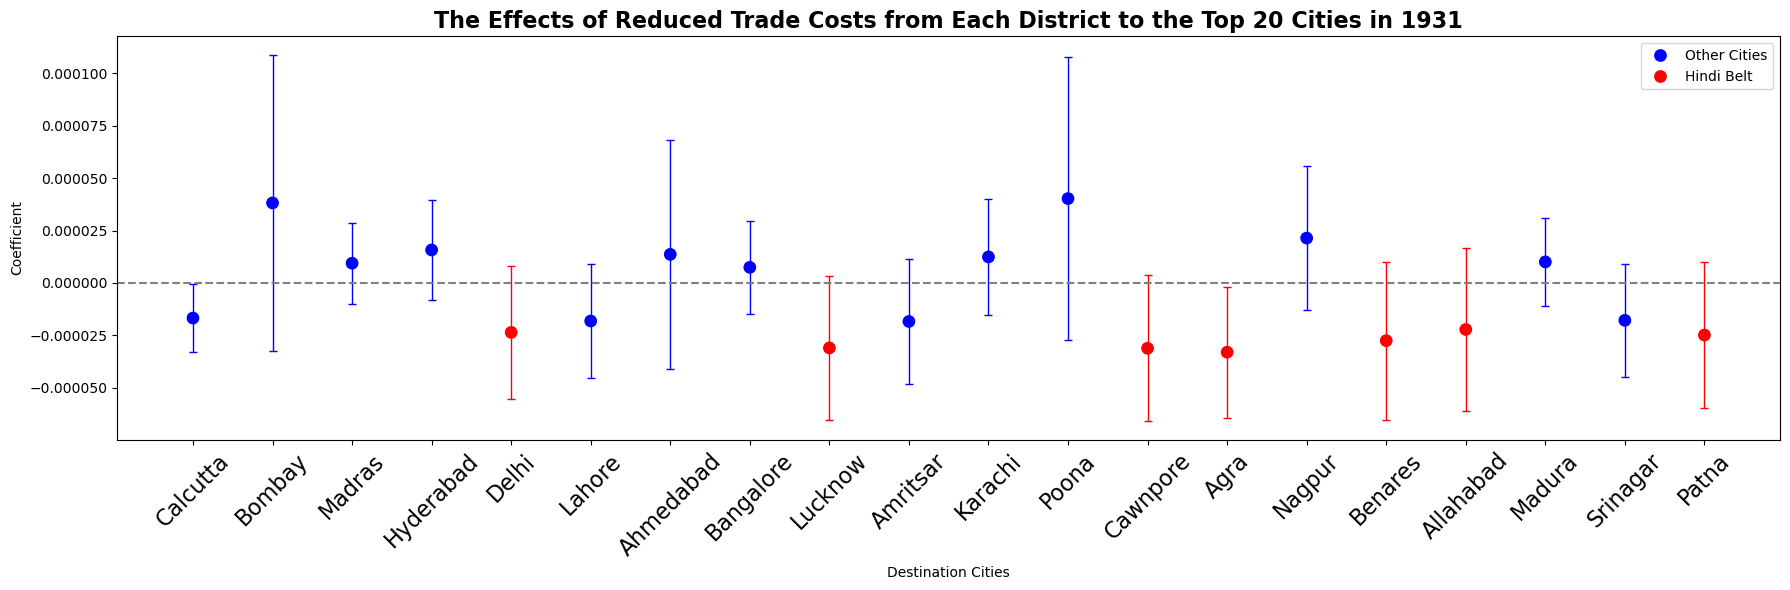

In [155]:

# Add a 'Group' column to the DataFrame
coefficients_1931['Group'] = coefficients_1931['varname'].apply(
    lambda x: 'Hindi Belt' if x in hindi_belt_1931 else 'Other Cities'
)

plt.figure(figsize=(18, 6))

# Plot the coefficients as points with hue
sns.scatterplot(
    x='varname',
    y='coef',
    data=coefficients_1931,
    hue='Group',
    palette={'Hindi Belt': 'red', 'Other Cities': 'blue'},
    s=100
)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Set font properties for x-axis labels
plt.setp(plt.gca().get_xticklabels(), fontsize=16)

# Add error bars manually with matching colors
for index, row in coefficients_1931.iterrows():
    plt.errorbar(
        x=row['varname'],
        y=row['coef'],
        yerr=1.96 * row['se'],
        fmt='none',
        ecolor='red' if row['Group'] == 'Hindi Belt' else 'blue',
        elinewidth=1,
        capsize=3
    )

# Add a horizontal line at y=0
plt.axhline(y=0, color='grey', linestyle='--')

# Set labels and title
plt.xlabel('Destination Cities')
plt.ylabel('Coefficient')
plt.title('The Effects of Reduced Trade Costs from Each District to the Top 20 Cities in 1931', fontdict={'fontsize': 16, 'fontweight': 'bold'})

# Adjust layout
plt.tight_layout()

# Display the legend
plt.legend()

plt.savefig('/Users/hanrui/Dropbox/Mac (3)/Documents/Infra&Nation/Results/Trade_Cost_1931.jpg')

plt.show()

